<a href="https://colab.research.google.com/github/brianp0513/NLP-project/blob/main/PCA_NLP_Project_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
%matplotlib inline
import time
import re
from wordcloud import WordCloud
import random
import os
from sklearn import metrics 
from scipy.spatial.distance import cdist
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import os 
plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def getTextFromFiles(df, data_path, depression, limit):
    """Return Data Frame """

    for file in os.listdir(data_path)[:limit]:
        with open(data_path + "/" + file, 'r', encoding="ISO-8859-1") as file1:
            file1 = file1.read()
            df = df.append({'text': file1, 'depression': int(depression)}, ignore_index=True)

    return df


In [ ]:
data_path_d = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_depression"
data_path_nd = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_non_depression"
df = pd.DataFrame(columns=['text', 'depression'])
reading_values = 50
df = getTextFromFiles(df, data_path_d, 1, reading_values)
df = getTextFromFiles(df, data_path_nd, 0, reading_values)

In [ ]:
 def dataPreprocessingForX(df, columnName1):
      df[columnName1] = df[columnName1].map(lambda text: text.lower())
      df[columnName1] = df[columnName1].map(lambda text: nltk.tokenize.word_tokenize(text))
      stop_words = set(nltk.corpus.stopwords.words('english'))
      df[columnName1] = df[columnName1].map(lambda tokens: [w for w in tokens if not w in stop_words])
      df[columnName1] = df[columnName1].map(lambda text: ' '.join(text))
      df[columnName1] = df[columnName1].map(lambda text: re.sub('[^A-Za-z]+', ' ', text))
      df[columnName1] = df[columnName1].map(lambda text: nltk.tokenize.word_tokenize(text))
      lemmatizer = WordNetLemmatizer()
      df[columnName1] = df[columnName1].map(lambda text: [lemmatizer.lemmatize(i) for i in text])
      df[columnName1] = df[columnName1].map(lambda text: ' '.join(text))

original data: (100, 4)
transform data : (100, 4)


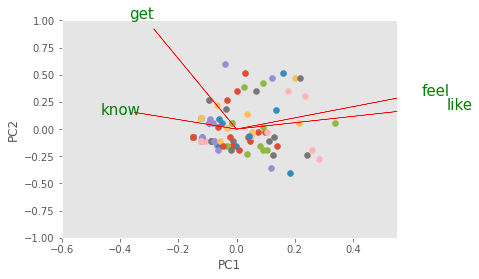

In [ ]:
dataPreprocessingForX(df, 'text')
X = df['text'].to_numpy()
Y = df['depression'].to_numpy()

# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)

sequences = tok.texts_to_sequences(X)

sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# count_vectorizer = CountVectorizer(ngram_range = ngram_range, min_df = min_df, max_fd =)
count_vectorizer = CountVectorizer(min_df=0.50) 
counts = count_vectorizer.fit_transform(X)
featnames = count_vectorizer.get_feature_names()
# print(featnames)
temp = counts.T.toarray()


user_named = os.listdir(data_path_d)
user_named = np.array(user_named)
user_namend = os.listdir(data_path_nd)
user_namend = np.array(user_namend)
user_name = []
for idx,user in enumerate(user_named):
  if(idx <reading_values):
    user_name.append(user)
for idx,user in enumerate(user_namend):
  if(idx <reading_values):
    user_name.append(user)
user_name = np.array(user_name)

words = dict({"user": user_name,"feel":temp[0],"get":temp[1],"know":temp[2],"like":temp[3]})

words1 = pd.DataFrame(words)
# 데이터 분리
userName = words1['user']
wordEval = words1[['feel', 'get', 'know', 'like']]
# 스케일러로 값 변환
scaler = StandardScaler()
scaler.fit(wordEval.values)
words_scaled = scaler.transform(wordEval.values)#(100,4)

# PCA 모델링
# PCA.fit():주성분 찾음
# PCA.transform() : 새로운 주성분으로 데이터 변환

# PCA modeling
from sklearn.decomposition import PCA

pca_words = PCA()
pca_words.fit(words_scaled)

# data transform
X_pca_words = pca_words.transform(words_scaled)

# look into data shape
print("original data: {0}".format(str(words_scaled.shape)))# (100,4)
print("transform data : {0}".format(str(X_pca_words.shape)))# (100,4)

# PCA 모델에 의해 산출된 값을 보면
# 첫행부터 pc1,pc2,pc3를 의미하며, 열은 각각 'feel', 'get', 'know', 'like'을 의미함
# print(pca_words.components_)


# 산출한 특성별 주성분 요소값과 특성들의 평가 스코어를 이용하여, 역산을 해보고 PCA 모델링을 통해 변환된 최종 데이터와 일치하는지 확인하는 작업
pc1 = 0
pc2 = 0
pc3 = 0
pc4 = 0

for i in range(len(pca_words.components_)):
  pc1 = pc1 + pca_words.components_[0][i] * words_scaled[:,i]#계수 4개에 있어서 스케일된 모든 열을 다 곱하고 더한 것 = pc1
  pc2 = pc2 + pca_words.components_[1][i] * words_scaled[:,i]
  pc3 = pc3 + pca_words.components_[2][i] * words_scaled[:,i]
  pc4 = pc4 + pca_words.components_[3][i] * words_scaled[:,i] 

pc1 = pc1.reshape(100,1)
pc2 = pc2.reshape(100,1)
pc3 = pc3.reshape(100,1)
pc4 = pc4.reshape(100,1)

np.round(np.hstack((pc1,pc2,pc3,pc4)),4) == np.round(X_pca_words,4)

def biplot2(score, coeff, pcax, pcay, labels = None):
  pca1 = pcax-1
  pca2 = pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n = score.shape[1]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())

  for i in range(len(xs)):
    plt.scatter(xs[i]*scalex,ys[i]*scaley)
    # 유저를 보여주나 너무 가시성이 떨어져서 커맨트 처리했다.
    # plt.annotate(label.iloc[i], xy = (xs[i]*scalex, ys[i]*scaley), ha = 'right')

  for i in range(n):
    plt.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color='r',alpha = 1)
    if labels is None:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,"Var"+str(i+1),color = 'g',ha = 'center',va = 'center')
    else:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15, labels[i],color = 'g',ha = 'center',va = 'center',size=15)
  # plt.xlim(-0.8,0.75)
  # plt.ylim(-1,1)
  plt.xlim(-0.6,0.55)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

biplot2(X_pca_words,pca_words.components_,1,2,labels=wordEval.columns)

위의 그래프를 보고 알수 있는 것

1. feel, like은 축의이 가까우므로, 둘 사이에 비교적 강한 양의 상관관계가 있다.
2. get, feel 의 경우 축의 거리가 멀기 떄문에 둘의 상관관계는 적다. 
점이 축과 반대편에 위치하면 그 단어의 점수가 낮다 즉 상관이 없다는 뜻이다. 
ex : 맨아래의 파란점을 기준으로 모든 단어와의 관계는 거의 없다. 
3. 점이 가운데 모일수록 모든 단어와 골로루 상관이 있으나 반대로 말하면 큰 특성을 보이지 않는 것
4. 빨간 화살표 벡터의 길이는 원변수의 분산을 표현하며, 길수록 분산이 크다. 
5.  Biplot 그림에서 화살표는 원변수와 PC(주성분)의 상관계수를 뜻하며, PC와 평행할수록 해당 PC에 큰 영향.

해석법 references:

https://blogs.sas.com/content/iml/2019/11/06/what-are-biplots.html

note:
K-mean에 input 데이터는 애초에 전제 자체가 잘못됬다. 이유는 군집 분석은 unsupervised learning으로서 우리가 labeling한 텍스트를 input으로집어넣은 시점부터 군집 분석이 제대로 이루어질수 없다. 물론 결과적으로 2군집일때 제일 효율적이라고 elbow그래프에 나와있다. 마치 우리가 depression, non-depression이라고 넣은 것처럼 말이다. 하지만 이것은 어쩔수 없다고 본다. 애초에 우리가 찾은 데이터는 depression,non-depression이라고 labeling되어 있는 데이터를 참고로 머신러닝을 진행했고 결과도 예상했던 대로 나왔다. 하지만 위의 주성분 분석(PCA : principal Component Analysis)로 통해 제일 많이 쓰인 단어 top4는 감정(emotion)과 연관이 있는 단어이다. 하지만 이것은 depression,non-depression 둘다 공통적으로 겪은 문제이다. 하지만 따로 둘이 분리 시켜서 countvector를 추출한 결과(밑의 코드),depression 문서는 life(인생)이라는 카테코리가 생기고 non-depression에서 주목할만 것은 friend(친구)라는 단어이다. 느낌적인 느낌으로 해석하자면 depression,non-depression은 둘다 감정 문제가 있지만 topic이 다른 것으로 추측된다. depression은 그들의 life(인생)자체에 대해 언급하고 non depression은 그들의 학우,친구(friends)에 대해 언급한다. (아래아래 그래프 참고)

(50,)
['feel', 'get', 'life', 'like']
['feel', 'friend', 'get', 'know', 'like', 'time', 'year']


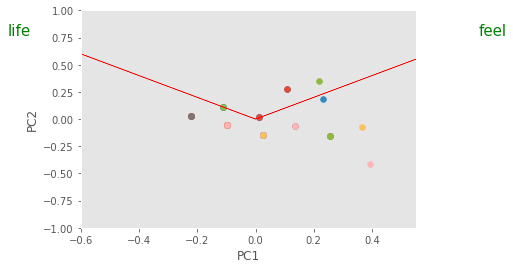

In [ ]:
depression_X = []
nondepression_X = []
for idx,i in enumerate(Y):
  if i ==1:
    depression_X.append(X[idx])
  else:
    nondepression_X.append(X[idx])
depression_X = np.array(depression_X)
nondepression_X = np.array(nondepression_X)

print(nondepression_X.shape)


d_count_vectorizer = CountVectorizer(min_df=0.42)
nd_count_vectorizer = CountVectorizer(min_df=0.50)
d_counts = d_count_vectorizer.fit_transform(depression_X)
nd_counts = nd_count_vectorizer.fit_transform(nondepression_X)
d_featnames = d_count_vectorizer.get_feature_names()
nd_featnames = nd_count_vectorizer.get_feature_names()
d_temp = d_counts.T.toarray()
nd_temp = nd_counts.T.toarray()
print(d_featnames)
print(nd_featnames)

d_words = dict({"feel": d_temp[0],"life":d_temp[2]})
d_words1 = pd.DataFrame(d_words)
nd_words = dict({"feel": d_temp[0],"friend":d_temp[1]})
nd_words1 = pd.DataFrame(nd_words)

# 데이터 분리
# userName = words1['user']
d_wordEval = d_words1[['feel','life']]
nd_wordEval = nd_words1[['feel','friend']]
# 스케일러로 값 변환
d_scaler = StandardScaler()
d_scaler.fit(d_wordEval.values)
d_words_scaled = d_scaler.transform(d_wordEval.values)# (50,2)

nd_scaler = StandardScaler()
nd_scaler.fit(nd_wordEval.values)
nd_words_scaled = d_scaler.transform(nd_wordEval.values)# (50,2)

# PCA 모델링
# PCA.fit():주성분 찾음
# PCA.transform() : 새로운 주성분으로 데이터 변환

# PCA modeling
from sklearn.decomposition import PCA

d_pca_words = PCA()
nd_pca_words = PCA()
d_pca_words.fit(d_words_scaled)
nd_pca_words.fit(nd_words_scaled)

# data transform
X_d_pca_words = d_pca_words.transform(d_words_scaled)
X_nd_pca_words = nd_pca_words.transform(nd_words_scaled)

biplot2(X_d_pca_words,d_pca_words.components_,1,2,labels=d_wordEval.columns)




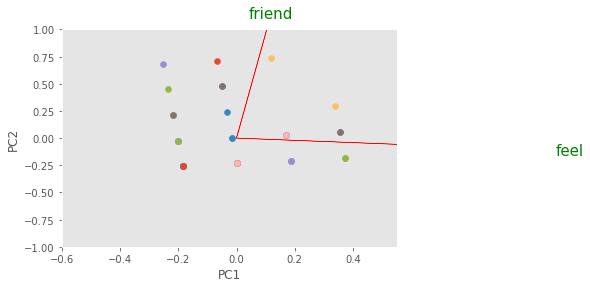

In [ ]:
biplot2(X_nd_pca_words,nd_pca_words.components_,1,2,labels=nd_wordEval.columns)

In [ ]:
X = counts.toarray()

In [ ]:
Sq_M_dataframe = pd.DataFrame(sequences_matrix)
print(Sq_M_dataframe)
sentencename = df.columns
print(sentencename)

    0    1    2    3    4    5    6    ...  143  144  145  146  147  148  149
0     0    0    0    0    0    0    0  ...    4   76   91  292  102   13  642
1     0    0    0    0    0    0    0  ...   17    4  644   17   12  889  645
2     0    0    0    0    0    0    0  ...  646   69   21  121   62   52  156
3     0    0    0    0    0    0    0  ...   46  115  232  209   88   11  896
4     0    0    0    0    0    0    0  ...   11  900  122  255  210  650  509
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
95    0    0    0    0    0    0    0  ...  633  334  875  868  692  107  442
96   37  134  125  108  298   32  437  ...  625   89   36   45   54  100  161
97    0    0    0    0    0    0    0  ...   81    3  112  360  237   73  395
98    0    0    0    0    0    0    0  ...   80  568   64   74  191  618  619
99  885  190  179  402   77  495   33  ...  119   29  117  204    4  170  997

[100 rows x 150 columns]
Index(['text', 'depression'], dtype='o

In [ ]:
init_centroid = 'k-means++'
y_kmList = []
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {}
K = range(1,10)
# X =  sequences_matrix
X_text = df['text'].to_numpy()
# print(X_text)
for k in K:
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, init = init_centroid, random_state=0)
    # y_km = kmeanModel.fit(X)
    y_km = kmeanModel.fit_predict(X)     

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    y_kmList.append(y_km)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
print(y_km.shape)


# print(np.shape(y_km))
# plt.scatter(X[y_km==0, 0], X[y_km==0,1],c='lightgreen',marker='s',s=510,label='cluster1')
# plt.scatter(X[y_km==1, 0], X[y_km==1,1],c='orange',marker='o',s=50,label='cluster2')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*',s=50,label='center')
# plt.legend()
# plt.grid(True)
# plt.show()


(100,)


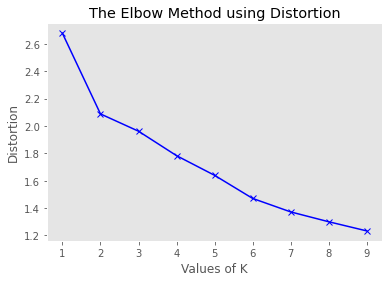

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.grid()
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

위의 그래프에서 알 수 있는 것은 k의 개수가 2 즉, 2 군집의 경우 제일 효율적인 케이스라고 알수 있다.

In [ ]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 2.67822092119798
2 : 2.0882645553245176
3 : 1.961788982470982
4 : 1.7828917911492832
5 : 1.6391121692131991
6 : 1.4701940675085365
7 : 1.371604115466727
8 : 1.2996064539955683
9 : 1.2326274250676739


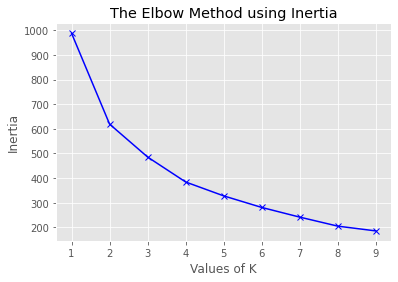

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

1 : 988.15
2 : 618.956874682902
3 : 485.2845100105374
4 : 383.90597147950086
5 : 327.4974053724054
6 : 280.5281107781108
7 : 241.19230769230774
8 : 204.54578754578756
9 : 185.23059163059162


In [ ]:
print(sequences_matrix)
print(y_km)

[[  0   0   0 ... 102  13 642]
 [  0   0   0 ...  12 889 645]
 [  0   0   0 ...  62  52 156]
 ...
 [  0   0   0 ... 237  73 395]
 [  0   0   0 ... 191 618 619]
 [885 190 179 ...   4 170 997]]
[8 3 3 8 3 1 3 7 0 3 0 3 8 3 7 3 7 0 3 7 1 2 3 3 0 0 3 3 0 0 3 2 3 8 0 8 3
 3 7 8 0 3 3 4 0 2 4 3 2 7 3 0 3 3 0 3 2 2 3 3 2 3 4 8 0 6 4 0 2 8 6 0 0 8
 0 5 8 0 3 2 6 3 8 4 0 6 3 3 2 4 3 2 3 7 2 3 0 3 3 4]


In [ ]:
o_list= []
l_list=[]

for idx,iteration in enumerate(y_km):
  if(iteration ==1):
    l_list.append(idx)
  else:
    o_list.append(idx)
print(o_list)
print(l_list)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[5, 20]


In [ ]:
print(X)

[[ 3  1  0  3]
 [ 0  0  0  0]
 [ 0  0  1  1]
 [ 3  1  1  3]
 [ 0  2  1  0]
 [ 5  2  0  7]
 [ 1  0  0  0]
 [ 0  2  0  2]
 [ 2  0  0  2]
 [ 0  1  0  0]
 [ 1  0  0  1]
 [ 0  2  0  0]
 [ 1  0  1  5]
 [ 0  1  0  0]
 [ 1  3  1  0]
 [ 0  0  1  1]
 [ 0  4  0  0]
 [ 1  0  0  3]
 [ 0  0  0  0]
 [ 0  3  1  2]
 [ 5  0  0  7]
 [ 2  1  3  0]
 [ 0  1  1  0]
 [ 1  1  0  0]
 [ 2  0  0  0]
 [ 1  0  0  1]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 1  0  1  2]
 [ 1  1  0  1]
 [ 0  0  0  0]
 [ 2  1  3  2]
 [ 0  2  0  0]
 [ 3  0  0  4]
 [ 2  0  0  1]
 [ 0  0  0  4]
 [ 0  0  0  0]
 [ 0  1  1  0]
 [ 1  3  1  2]
 [ 3  2  2  4]
 [ 3  0  1  1]
 [ 1  0  0  0]
 [ 0  0  0  0]
 [ 1  2  1  5]
 [ 2  0  0  0]
 [ 0  2  2  0]
 [ 2  4  1  4]
 [ 0  1  0  0]
 [ 2  1  2  1]
 [ 1  4  1  0]
 [ 0  0  0  1]
 [ 1  1  0  2]
 [ 0  0  1  1]
 [ 0  0  0  0]
 [ 2  0  0  1]
 [ 0  0  1  0]
 [ 1  1  3  1]
 [ 0  0  2  1]
 [ 0  0  0  1]
 [ 0  0  0  0]
 [ 1  2  2  1]
 [ 0  0  0  0]
 [ 2  3  1  6]
 [ 1  1  2  3]
 [ 0  1  0  2]
 [ 0  0  7  2]
 [ 1  4  2

In [ ]:
print(X.shape)
cluster_o = []
cluster_l = []
for index in o_list:
  sentence = X_text[index]
  cluster_o.append(sentence)
print(cluster_o)
for index in l_list:
  sentence = X_text[index]
  cluster_l.append(sentence)
print(cluster_l)

(100, 4)
['want pay debt kill came really poor family worked hard primary secondary school got scholarship college paid k year well covering school fee gave parent money paid bill well sibling s school fee thought life good studying love however got bullied cant take anymore requested change class school rejected request requested take semester school contract scholarship state complete school year contract terminated failed module extend time college year caused scholarship terminated turn placed k debt n t money pay school leave im without qualification except secondary school cert organisation offered scholarship requesting k per month installment ve always looked forward dream job close volunteer every weekend get experience job feel like everything taken appealed scholarship reinstated time explaining issue giving medical report doctor bringing volunteer work latest attempt got call saying never planned accept appeal really feel like everything taken feel like working pay debt bur

In [ ]:
print(cluster_o)

['want pay debt kill came really poor family worked hard primary secondary school got scholarship college paid k year well covering school fee gave parent money paid bill well sibling s school fee thought life good studying love however got bullied cant take anymore requested change class school rejected request requested take semester school contract scholarship state complete school year contract terminated failed module extend time college year caused scholarship terminated turn placed k debt n t money pay school leave im without qualification except secondary school cert organisation offered scholarship requesting k per month installment ve always looked forward dream job close volunteer every weekend get experience job feel like everything taken appealed scholarship reinstated time explaining issue giving medical report doctor bringing volunteer work latest attempt got call saying never planned accept appeal really feel like everything taken feel like working pay debt burden famil

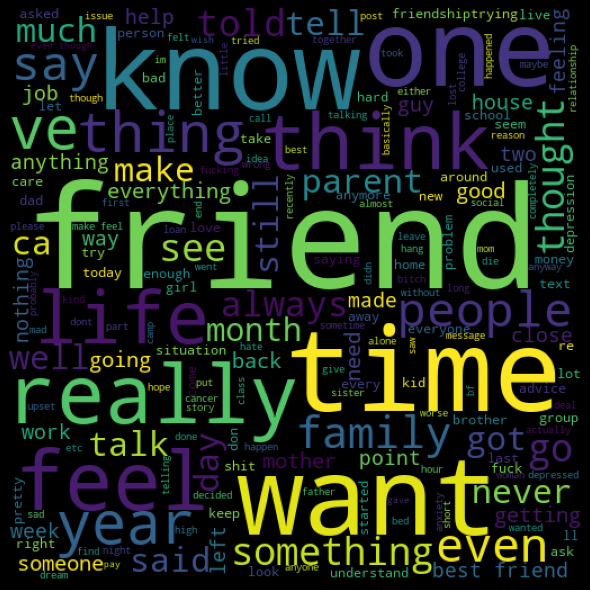

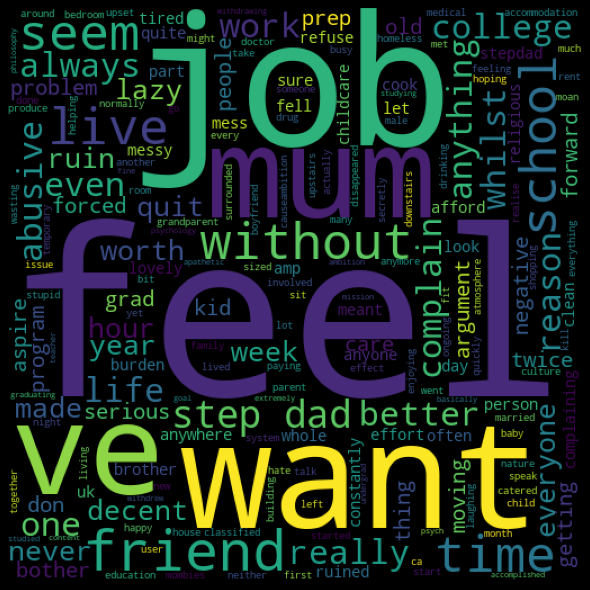

In [ ]:
def makeWorldCloud(llist):
  depression_words = ''.join(llist)
  depression_wordclod = WordCloud(width = 512,height = 512).generate(depression_words)
  plt.figure(figsize = (10, 8), facecolor = 'k')
  plt.imshow(depression_wordclod)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()
makeWorldCloud(cluster_o)
makeWorldCloud(cluster_l)